<a href="https://colab.research.google.com/github/Haran29/Deep-Learning/blob/main/DL_Project_2_MNIST_Digit_Classification_with_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

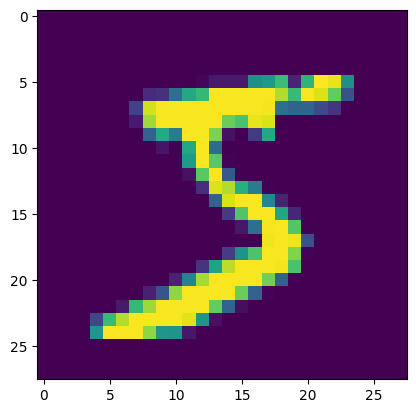

In [7]:
plt.imshow(x_train[0])
plt.show()


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten


model = Sequential()
model.add(Flatten(input_shape=((28,28))))
model.add(Dense(activation = 'relu',units=50))
model.add(Dense(activation = 'relu',units=50))
model.add(Dense(activation = 'softmax',units=10))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2911 - accuracy: 0.9170
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1358 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1027 - accuracy: 0.9686
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0833 - accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0690 - accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0590 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0500 - accuracy: 0.9840
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0456 - accuracy: 0.9853
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0394 - accuracy: 0.9872
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.034

In [9]:
loss,accurate = model.evaluate(x_test,y_test)
print("Loss:",loss)
print("accurate:",accurate)

313/313 [==============================] - 1s 3ms/step - loss: 0.0918 - accuracy: 0.9748
Loss: 0.09181826561689377
accurate: 0.9747999906539917


In [13]:
y_predict = model.predict(x_test)

y_predict = [np.argmax(pred) for pred in y_predict]
print(y_predict)

313/313 [==============================] - 1s 2ms/step
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1,

In [42]:
#path = input('Enter the path of the image:')
#cv2_imshow(resized)
#cv2.imwrite('/content/resized_MNIST_digit.png', resized)
path =  "/content/MNIST_digit.png"
image = cv2.imread(path)
resized = cv2.resize(image, (28, 28))
grayscale_image = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
image_reshaped = np.reshape(grayscale_image, [1,28,28])
output = model.predict(image_reshaped)
print(np.argmax(output))

1/1 [==============================] - 0s 17ms/step
3


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)